# Manejo de datos

Enlace de los datos: https://www.kaggle.com/datasets/laotse/credit-risk-dataset/data

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [129]:
ruta_data = 'Datos/credit_risk_dataset.csv'

In [130]:
df_credit = pd.read_csv(ruta_data)

In [131]:
df_credit

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [132]:
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [133]:
df_credit.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [134]:
df_credit.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


# Menejo de datos atipicos en edad y tiempo de trabajo de la persona

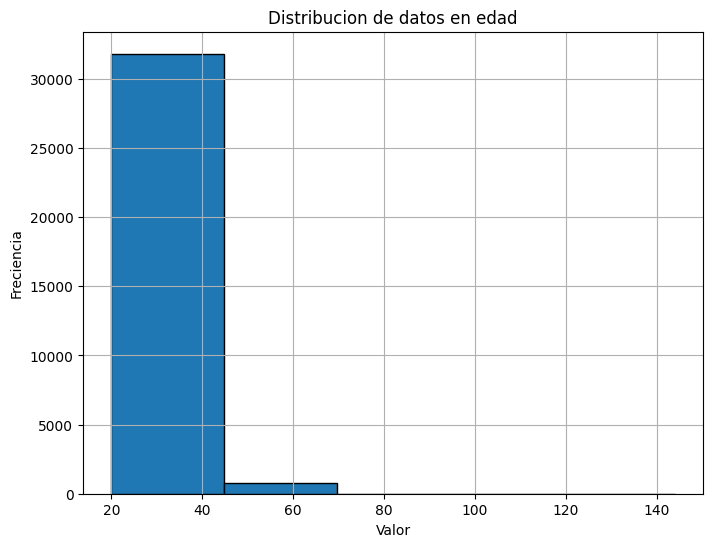

In [135]:
plt.figure(figsize=(8,6))
plt.hist(df_credit['person_age'], bins=5,edgecolor='black')
plt.title('Distribucion de datos en edad')
plt.xlabel('Valor')
plt.ylabel('Freciencia')
plt.grid(True)
plt.show()

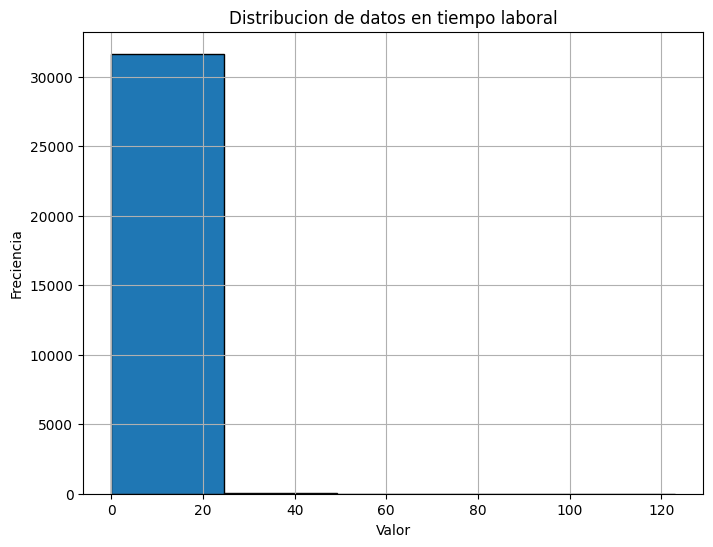

In [136]:
plt.figure(figsize=(8,6))
plt.hist(df_credit['person_emp_length'], bins=5,edgecolor='black')
plt.title('Distribucion de datos en tiempo laboral')
plt.xlabel('Valor')
plt.ylabel('Freciencia')
plt.grid(True)
plt.show()

In [137]:
# Elejir registros edad en rango de 20 a 60 años , tiempo de trabajo en rango de 0 a 40 años
df_credit_copia = df_credit.drop(df_credit[(df_credit['person_age'] > 60) | (df_credit['person_emp_length'] > 40)].index)

In [138]:
df_credit_copia.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32509.000000,3.250900e+04,31615.000000,32509.000000,29404.000000,32509.000000,32509.000000,32509.000000
mean,27.640592,6.581250e+04,4.778871,9582.322588,11.011214,0.218093,0.170167,5.767111
std,5.956031,5.167087e+04,4.018175,6313.429762,3.240006,0.412958,0.106736,3.970010
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12150.000000,13.470000,0.000000,0.230000,8.000000
max,60.000000,2.039784e+06,38.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [139]:
df_credit_copia.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              894
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3105
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

# Ver comportamimiento de las clases en variable de interes

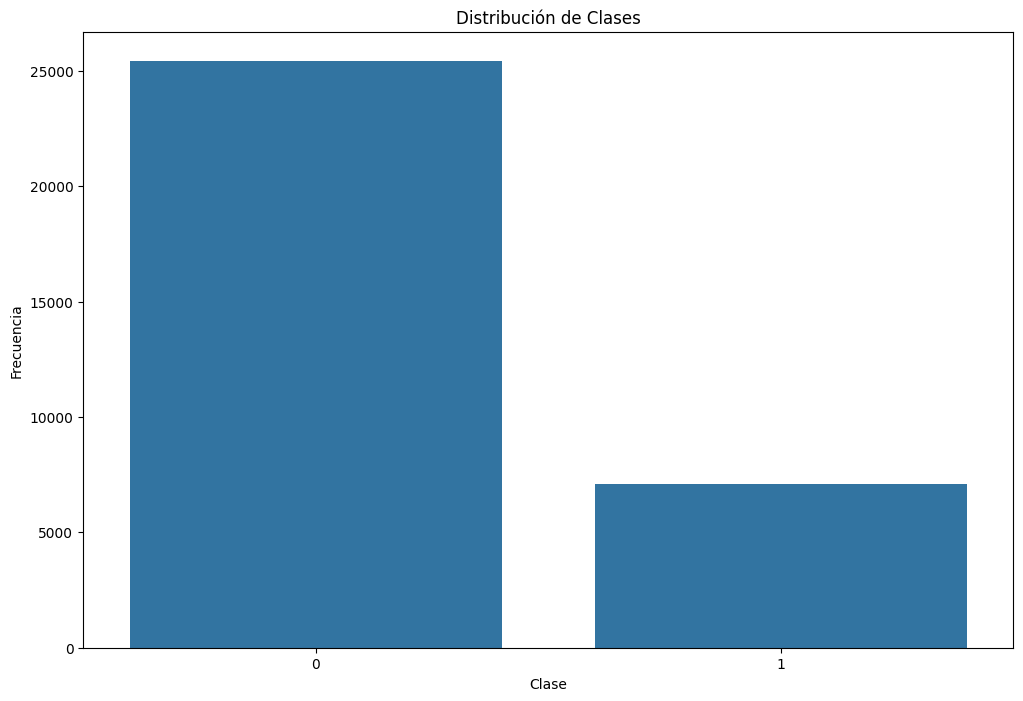

In [140]:
class_counts_c = df_credit_copia['loan_status'].value_counts()

# Graficar la distribución de las clases
plt.figure(figsize=(12, 8))
sns.barplot(x=class_counts_c.index, y=class_counts_c.values)
plt.title('Distribución de Clases')
plt.xlabel('Clase')
plt.ylabel('Frecuencia')
# Rotar las etiquetas en el eje x para mejorar la legibilidad
#plt.xticks(rotation=45)
plt.show()

In [141]:
class_counts_c

loan_status
0    25419
1     7090
Name: count, dtype: int64

# Analizar datos nulos en clase minoritaria

In [142]:
df_data_1 = df_credit_copia[df_credit_copia['loan_status']==1]

df_data_1.isnull().sum()

person_age                      0
person_income                   0
person_home_ownership           0
person_emp_length             282
loan_intent                     0
loan_grade                      0
loan_amnt                       0
loan_int_rate                 642
loan_status                     0
loan_percent_income             0
cb_person_default_on_file       0
cb_person_cred_hist_length      0
dtype: int64

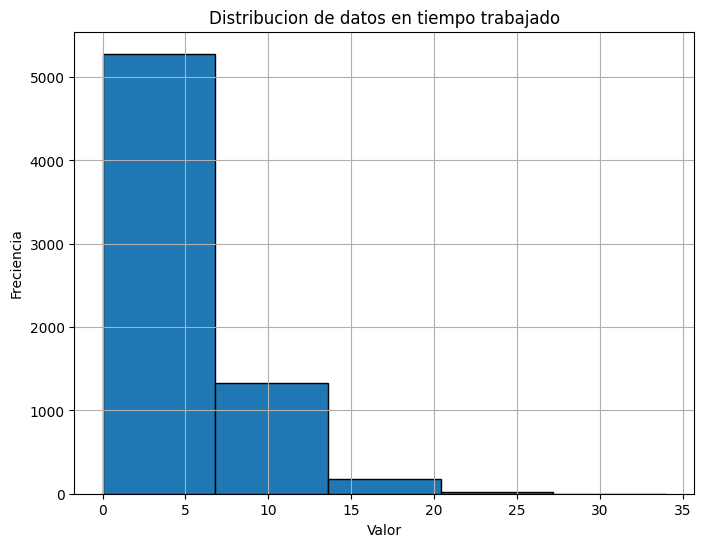

In [143]:
plt.figure(figsize=(8,6))
plt.hist(df_data_1['person_emp_length'], bins=5,edgecolor='black')
plt.title('Distribucion de datos en tiempo trabajado')
plt.xlabel('Valor')
plt.ylabel('Freciencia')
plt.grid(True)
plt.show()

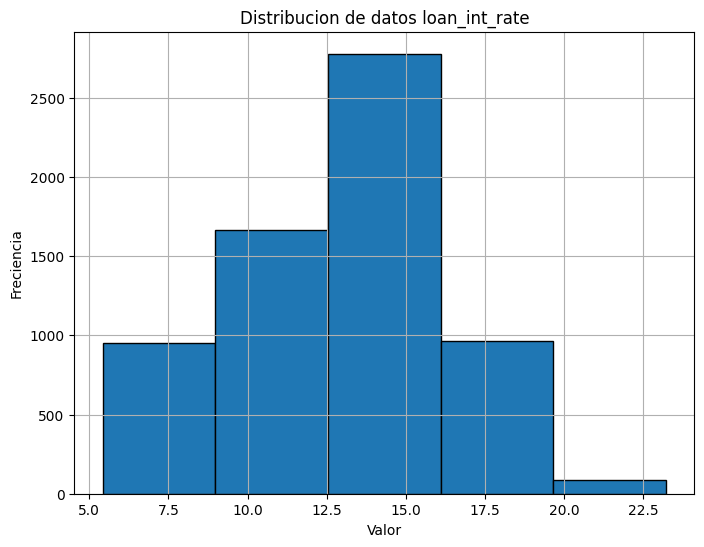

In [144]:
plt.figure(figsize=(8,6))
plt.hist(df_data_1['loan_int_rate'], bins=5,edgecolor='black')
plt.title('Distribucion de datos loan_int_rate')
plt.xlabel('Valor')
plt.ylabel('Freciencia')
plt.grid(True)
plt.show()

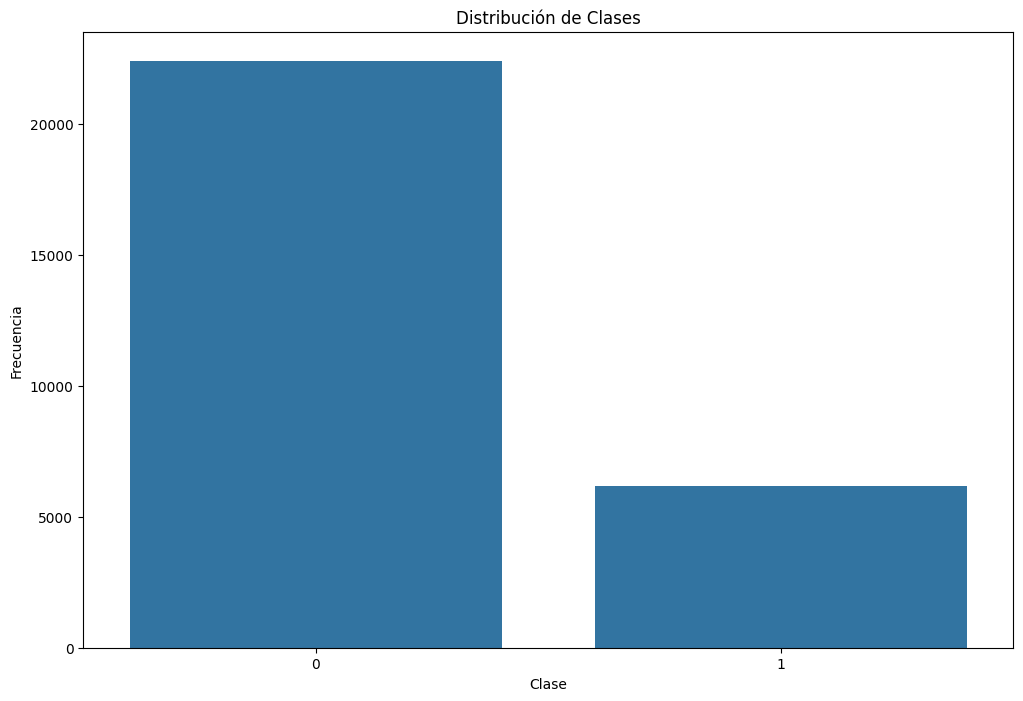

In [145]:
# eliminar datos nulos ya que imputar no es necesario
df_credit_EN = df_credit_copia.dropna()

# ver comportamimiento de las clases en variable de interes

class_counts_EN = df_credit_EN['loan_status'].value_counts()

# Graficar la distribución de las clases
plt.figure(figsize=(12, 8))
sns.barplot(x=class_counts_EN.index, y=class_counts_EN.values)
plt.title('Distribución de Clases')
plt.xlabel('Clase')
plt.ylabel('Frecuencia')
# Rotar las etiquetas en el eje x para mejorar la legibilidad
#plt.xticks(rotation=45)
plt.show()

In [146]:
class_counts_EN

loan_status
0    22391
1     6187
Name: count, dtype: int64

# Balanceo de datos de la variable objetivo

In [147]:
# apliar submuestreo simple de clase mayoritara

df_clase_0 = df_credit_EN[df_credit_EN['loan_status']==0]

# seleccioar aleatoriamente
df_clase0_r = df_clase_0.sample(n=6187, random_state=42)

df_calse_1_n = df_credit_EN[df_credit_EN['loan_status']==1]

df_balanced_1 = pd.concat([df_clase0_r,df_calse_1_n])

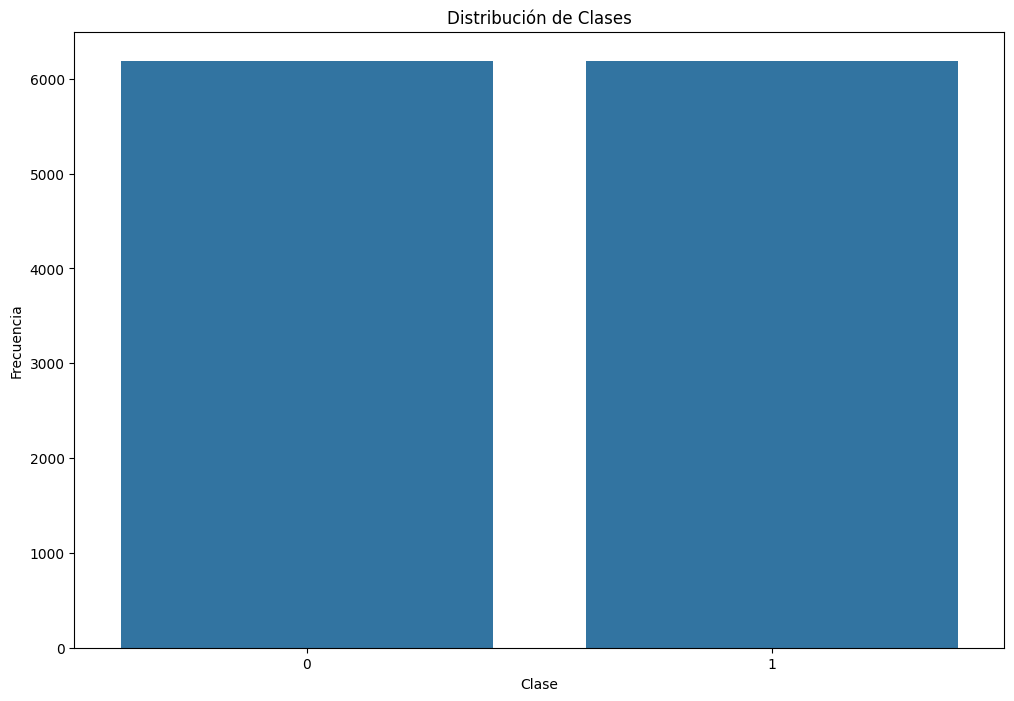

In [148]:
class_counts_b = df_balanced_1['loan_status'].value_counts()

# Graficar la distribución de las clases
plt.figure(figsize=(12, 8))
sns.barplot(x=class_counts_b.index, y=class_counts_b.values)
plt.title('Distribución de Clases')
plt.xlabel('Clase')
plt.ylabel('Frecuencia')
# Rotar las etiquetas en el eje x para mejorar la legibilidad
#plt.xticks(rotation=45)
plt.show()

# Normalizar datos, codificar categorias

In [149]:
df_balanced_1.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
19386,31,30000,RENT,2.0,PERSONAL,B,3000,10.95,0,0.10,N,8
2691,26,33800,MORTGAGE,9.0,VENTURE,A,14400,7.88,0,0.43,N,3
16515,25,38496,MORTGAGE,7.0,HOMEIMPROVEMENT,A,8000,6.03,0,0.21,N,3
10337,24,67000,OWN,2.0,MEDICAL,B,16000,12.69,0,0.24,N,4
32362,52,48000,RENT,3.0,MEDICAL,C,11000,12.73,0,0.23,N,22


In [182]:
df_balanced_1.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,12374.000000,1.237400e+04,12374.000000,12374.000000,12374.000000,12374.00000,12374.000000,12374.000000
mean,27.518183,6.103587e+04,4.533861,10153.505334,11.779791,0.50000,0.197149,5.695571
std,5.906690,4.921658e+04,3.976201,6644.732294,3.389992,0.50002,0.122082,3.940089
min,20.000000,4.000000e+03,0.000000,750.000000,5.420000,0.00000,0.000000,2.000000
25%,23.000000,3.480000e+04,2.000000,5000.000000,8.940000,0.00000,0.100000,3.000000
50%,26.000000,5.095500e+04,4.000000,8687.500000,11.830000,0.50000,0.170000,4.000000
75%,30.000000,7.400000e+04,7.000000,14000.000000,14.350000,1.00000,0.280000,8.000000
max,60.000000,1.440000e+06,34.000000,35000.000000,23.220000,1.00000,0.780000,30.000000


In [150]:
colum_num =['person_age','person_income','person_emp_length','loan_amnt','loan_int_rate','loan_percent_income','cb_person_cred_hist_length']
colum_cat = ['person_home_ownership','loan_intent','loan_grade','cb_person_default_on_file']

In [151]:
df_balanced_f = df_balanced_1.copy() # copia del df para no alterar los datos originales en los preprocesamientos de datos antes de entrenar

In [152]:
from sklearn.preprocessing import LabelEncoder # tranfromar datosd categoricos en numeros enteros
from sklearn.preprocessing import MinMaxScaler # herramienta para normalizar datos numericos en rango de 0 a 1
import joblib
#encoder_cat = LabelEncoder()
encoder_num = MinMaxScaler()
encoder_num.fit(df_balanced_f[colum_num])
# Guardamos el encoder en un archivo
joblib.dump(encoder_num, 'encoder_num.pkl')

print('Parametros min max del encoder')
print(encoder_num.data_max_, encoder_num.data_max_)
# Cargamos el encoder desde el archivo
encoder_load = joblib.load('encoder_num.pkl')

print('Parametros min max del encoder cargado')
print(encoder_load.data_min_, encoder_load.data_max_)
# Aplica encoder numerico a variables int y float
#df_balanced_f[colum_num] = encoder_num.fit_transform(df_balanced_f[colum_num])
df_balanced_f[colum_num] = encoder_load.transform(df_balanced_f[colum_num])

# Guardamos el encoder en un archivo
#joblib.dump(encoder_num, 'encoder_num.pkl')

Parametros min max del encoder
[6.000e+01 1.440e+06 3.400e+01 3.500e+04 2.322e+01 7.800e-01 3.000e+01] [6.000e+01 1.440e+06 3.400e+01 3.500e+04 2.322e+01 7.800e-01 3.000e+01]
Parametros min max del encoder cargado
[2.00e+01 4.00e+03 0.00e+00 7.50e+02 5.42e+00 0.00e+00 2.00e+00] [6.000e+01 1.440e+06 3.400e+01 3.500e+04 2.322e+01 7.800e-01 3.000e+01]


In [184]:
encoder_num.feature_names_in_

array(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income',
       'cb_person_cred_hist_length'], dtype=object)

In [193]:
encoder_load.data_min_

array([2.00e+01, 4.00e+03, 0.00e+00, 7.50e+02, 5.42e+00, 0.00e+00,
       2.00e+00])

# Aplicar encoder categorico para tranfromar datos de texto en numero por columna

In [153]:
# Aplicar encoder categorico para tranfromar datos de texto en numero por columna

colum_in = df_balanced_f['person_home_ownership']
encoder_cat_1 = LabelEncoder()

encoder_cat_1.fit(colum_in)

mapeo_categorias_1 = dict(zip(encoder_cat_1.classes_, encoder_cat_1.transform(encoder_cat_1.classes_)))
# usar encoder para tranfromar categoria de columna de interes
colum_tran_1 = encoder_cat_1.transform(colum_in)

df_balanced_f['p_h_o_trans'] = colum_tran_1

#df_balanced_1[colum_cat] = encoder_cat.fit_transform(df_balanced_1[colum_cat])
mapeo_categorias_1

{'MORTGAGE': 0, 'OTHER': 1, 'OWN': 2, 'RENT': 3}

In [154]:
# Aplicar encoder categorico para tranfromar datos de texto en numero por columna

colum_in_2 = df_balanced_f['loan_intent']
encoder_cat_2 = LabelEncoder()

encoder_cat_2.fit(colum_in_2)

mapeo_categorias_2 = dict(zip(encoder_cat_2.classes_, encoder_cat_2.transform(encoder_cat_2.classes_)))
# usar encoder para tranfromar categoria de columna de interes
colum_tran_2 = encoder_cat_2.transform(colum_in_2)

df_balanced_f['loan_intent_trans'] = colum_tran_2
mapeo_categorias_2

{'DEBTCONSOLIDATION': 0,
 'EDUCATION': 1,
 'HOMEIMPROVEMENT': 2,
 'MEDICAL': 3,
 'PERSONAL': 4,
 'VENTURE': 5}

In [155]:
colum_in_3 = df_balanced_f['loan_grade']
encoder_cat_3 = LabelEncoder()

encoder_cat_3.fit(colum_in_3)

mapeo_categorias_3 = dict(zip(encoder_cat_3.classes_, encoder_cat_3.transform(encoder_cat_3.classes_)))
# usar encoder para tranfromar categoria de columna de interes
colum_tran_3 = encoder_cat_3.transform(colum_in_3)

df_balanced_f['loan_grade_trans'] = colum_tran_3
mapeo_categorias_3

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6}

In [156]:
colum_in_4 = df_balanced_f['cb_person_default_on_file']
encoder_cat_4 = LabelEncoder()

encoder_cat_4.fit(colum_in_4)

mapeo_categorias_4 = dict(zip(encoder_cat_4.classes_, encoder_cat_4.transform(encoder_cat_4.classes_)))
# usar encoder para tranfromar categoria de columna de interes
colum_tran_4 = encoder_cat_4.transform(colum_in_4)

df_balanced_f['cb_pdf_trans'] = colum_tran_4
mapeo_categorias_4

{'N': 0, 'Y': 1}

In [157]:
df_balanced_f

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,p_h_o_trans,loan_intent_trans,loan_grade_trans,cb_pdf_trans
19386,0.275,0.018106,RENT,0.058824,PERSONAL,B,0.065693,0.310674,0,0.128205,N,0.214286,3,4,1,0
2691,0.150,0.020752,MORTGAGE,0.264706,VENTURE,A,0.398540,0.138202,0,0.551282,N,0.035714,0,5,0,0
16515,0.125,0.024022,MORTGAGE,0.205882,HOMEIMPROVEMENT,A,0.211679,0.034270,0,0.269231,N,0.035714,0,2,0,0
10337,0.100,0.043872,OWN,0.058824,MEDICAL,B,0.445255,0.408427,0,0.307692,N,0.071429,2,3,1,0
32362,0.800,0.030641,RENT,0.088235,MEDICAL,C,0.299270,0.410674,0,0.294872,N,0.714286,3,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32561,0.850,0.087047,MORTGAGE,0.176471,EDUCATION,B,0.240876,0.341011,1,0.089744,N,0.785714,0,1,1,0
32563,0.800,0.047019,RENT,0.000000,EDUCATION,E,0.182482,0.640449,1,0.128205,Y,0.785714,3,1,4,1
32565,0.925,0.025070,RENT,0.029412,MEDICAL,A,0.416058,0.195506,1,0.487179,N,0.678571,3,3,0,0
32571,1.000,0.028969,RENT,0.029412,VENTURE,B,0.562044,0.257303,1,0.564103,N,0.857143,3,5,1,0


# Definir variables de entrada o matriz "X" y variable objetivo o "y"

In [158]:
df_final = df_balanced_f.drop(columns=colum_cat)

df_final.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,p_h_o_trans,loan_intent_trans,loan_grade_trans,cb_pdf_trans
19386,0.275,0.018106,0.058824,0.065693,0.310674,0,0.128205,0.214286,3,4,1,0
2691,0.150,0.020752,0.264706,0.398540,0.138202,0,0.551282,0.035714,0,5,0,0
16515,0.125,0.024022,0.205882,0.211679,0.034270,0,0.269231,0.035714,0,2,0,0
10337,0.100,0.043872,0.058824,0.445255,0.408427,0,0.307692,0.071429,2,3,1,0
32362,0.800,0.030641,0.088235,0.299270,0.410674,0,0.294872,0.714286,3,3,2,0


In [159]:
X = df_final.drop('loan_status', axis=1)

y = df_final['loan_status']

In [160]:
X

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,p_h_o_trans,loan_intent_trans,loan_grade_trans,cb_pdf_trans
19386,0.275,0.018106,0.058824,0.065693,0.310674,0.128205,0.214286,3,4,1,0
2691,0.150,0.020752,0.264706,0.398540,0.138202,0.551282,0.035714,0,5,0,0
16515,0.125,0.024022,0.205882,0.211679,0.034270,0.269231,0.035714,0,2,0,0
10337,0.100,0.043872,0.058824,0.445255,0.408427,0.307692,0.071429,2,3,1,0
32362,0.800,0.030641,0.088235,0.299270,0.410674,0.294872,0.714286,3,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...
32561,0.850,0.087047,0.176471,0.240876,0.341011,0.089744,0.785714,0,1,1,0
32563,0.800,0.047019,0.000000,0.182482,0.640449,0.128205,0.785714,3,1,4,1
32565,0.925,0.025070,0.029412,0.416058,0.195506,0.487179,0.678571,3,3,0,0
32571,1.000,0.028969,0.029412,0.562044,0.257303,0.564103,0.857143,3,5,1,0


In [161]:
y

19386    0
2691     0
16515    0
10337    0
32362    0
        ..
32561    1
32563    1
32565    1
32571    1
32574    1
Name: loan_status, Length: 12374, dtype: int64

# Corte de conjutno de datos entrenamiento y prueba

In [162]:
from sklearn.model_selection import train_test_split

# División del conjutno de datos en entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42 )

print('Conjunto de datos de entrada de entrenamiento', X_train.shape)
print('Conjunto de datos de salida de entrenamiento', y_train.shape)

print('Conjunto de datos de entrada de prueba', X_test.shape)
print('Conjunto de datos de salida de prueba', y_test.shape)

Conjunto de datos de entrada de entrenamiento (9899, 11)
Conjunto de datos de salida de entrenamiento (9899,)
Conjunto de datos de entrada de prueba (2475, 11)
Conjunto de datos de salida de prueba (2475,)


# Entrenar modelo de machine learning

In [163]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [164]:
# definir los mdoelos
model_dt = DecisionTreeClassifier()

model_svc = SVC()

model_rfc = RandomForestClassifier()# Entrenar modelo de machine learning

In [165]:
# Entrenar model DecisionTreeClassifier()

model_dt.fit(X_train, y_train)

y_pred_dt = model_dt.predict(X_test)

accuracy_dt = accuracy_score( y_test, y_pred_dt)

print('Exactitud del modelo DecisionTreeClassifier = ', accuracy_dt)

Exactitud del modelo DecisionTreeClassifier =  0.802020202020202


In [166]:
# Obtener los datos del sexto dato de X_test
dato_a_predecir = X_test.iloc[5]

# Convertir los datos a una matriz de características con una sola fila
dato_a_predecir = np.array(dato_a_predecir).reshape(1, -1)

# Ahora, puedes llamar al método predict() del modelo y pasar el dato a predecir
prediccion = model_dt.predict(dato_a_predecir)

# La variable 'prediccion' contendrá el resultado de la predicción para este solo dato
print('Predicción para el sexto dato:', prediccion)
print('label real para el sexto dato:', y_test.iloc[5])

Predicción para el sexto dato: [1]
label real para el sexto dato: 1


d:\Proyectos_IA\Credit_predic\venv_credit\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [167]:
type(y_test)

pandas.core.series.Series

In [168]:
# Entrenar model SVC

model_svc.fit(X_train, y_train)

y_pred_dt_2 = model_svc.predict(X_test)

accuracy_dt_2 = accuracy_score( y_test, y_pred_dt_2)

print('Exactitud del modelo SVC = ', accuracy_dt_2)

Exactitud del modelo SVC =  0.7947474747474748


In [169]:
# Entrenar model RandomForestClassifier

model_rfc.fit(X_train, y_train)

y_pred_dt_3 = model_rfc.predict(X_test)

accuracy_dt_3 = accuracy_score( y_test, y_pred_dt_3)

print('Exactitud del modelo RandomForestClassifier = ', accuracy_dt_3)

Exactitud del modelo RandomForestClassifier =  0.8525252525252526


# Empaquetar modelo 

In [170]:
import joblib

joblib.dump(model_svc,'model_credit_svc.plk')

['model_credit_svc.plk']

In [171]:
# extraccion de datos reales para normalizar 

valores = df_credit.iloc[1]

valores

person_age                           21
person_income                      9600
person_home_ownership               OWN
person_emp_length                   5.0
loan_intent                   EDUCATION
loan_grade                            B
loan_amnt                          1000
loan_int_rate                     11.14
loan_status                           0
loan_percent_income                 0.1
cb_person_default_on_file             N
cb_person_cred_hist_length            2
Name: 1, dtype: object

In [172]:
valores_num= valores[colum_num]

valores_num

person_age                       21
person_income                  9600
person_emp_length               5.0
loan_amnt                      1000
loan_int_rate                 11.14
loan_percent_income             0.1
cb_person_cred_hist_length        2
Name: 1, dtype: object

In [173]:
person_age = valores.iloc[0]
person_income = valores.iloc[1]
person_emp_length = valores.iloc[3]
loan_amnt = valores.iloc[6]
loan_int_rate = valores.iloc[7]
loan_percent_income = valores.iloc[9]
cb_person_cred_hist_length = valores.iloc[11]

#datos_a_nor =[person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length]
datos_a_nor = np.array([person_age, person_income, person_emp_length, loan_amnt, loan_int_rate, loan_percent_income, cb_person_cred_hist_length])

# Cambia la forma del array a bidimensional
datos_a_nor = datos_a_nor.reshape(1, -1)

df_d_n = pd.DataFrame({'person_age' : [person_age],
                        'person_income' : [person_income],
                        'person_emp_length' : [person_emp_length],
                        'loan_amnt' : [loan_amnt],
                        'loan_int_rate' : [loan_int_rate],
                        'loan_percent_income' : [loan_percent_income],
                        'cb_person_cred_hist_length' : [cb_person_cred_hist_length]})

In [197]:
# Cargamos el encoder desde el archivo
#encoder_num = joblib.load('encoder_num.pkl')

# Normalizamos nuevos datos
datos_norm = encoder_load.transform(datos_a_nor)

d:\Proyectos_IA\Credit_predic\venv_credit\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [198]:
datos_norm

array([[0.025     , 0.00389972, 0.14705882, 0.00729927, 0.32134831,
        0.12820513, 0.        ]])

In [200]:
person_age_n = datos_norm[0, 0]
person_income_n = datos_norm[0, 1]
person_emp_length_n = datos_norm[0, 2]
loan_amnt_n = datos_norm[0, 3]
loan_int_rate_n = datos_norm[0, 4]
loan_percent_income_n = datos_norm[0, 5]
cb_person_cred_hist_length_n = datos_norm[0, 6]
#Value categorical
p_h_o_trans = 2
loan_intent_trans =1
loan_grade_trans =1
cb_pdf_trans =0

In [201]:
person_income

9600

In [202]:
person_income_n

0.0038997214484679673

In [203]:
def min_max_scaler(x, feature_min, feature_max, new_min=0, new_max=1):
    return new_min + (x - feature_min) * (new_max - new_min) / (feature_max - feature_min)

# Ejemplo de uso:
x = 21  # Valor original que queremos escalar
feature_min = 20  # Mínimo valor en el rango original
feature_max = 60  # Máximo valor en el rango original
new_min = 0  # Nuevo mínimo valor del rango
new_max = 1  # Nuevo máximo valor del rango

x_scaled = min_max_scaler(x, feature_min, feature_max, new_min, new_max)
print("Valor escalado:", x_scaled)

Valor escalado: 0.025


In [204]:
dato_pre_c = np.array([
        [person_age_n, person_income_n, person_emp_length_n, loan_amnt_n, loan_int_rate_n, 
         loan_percent_income_n, cb_person_cred_hist_length_n, p_h_o_trans, 
         loan_intent_trans, loan_grade_trans, cb_pdf_trans]
])

In [206]:
#Probar modelo empaquetado

model_load = joblib.load('model_credit_dt.plk')

#predic_model = model_load.predict(X_test[:5])

#print('Prediciones modelo guardado:', predic_model)

prediccion_load = model_load.predict(dato_a_predecir)

# La variable 'prediccion' contendrá el resultado de la predicción para este solo dato
print('Predicción para el sexto dato:', prediccion_load)
print('label real para el sexto dato:', y_test.iloc[5])

Predicción para el sexto dato: [1]
label real para el sexto dato: 1


d:\Proyectos_IA\Credit_predic\venv_credit\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [207]:
prediccion_load_c = model_load.predict(dato_pre_c)
print('Predicción para el dato selecioando es:', prediccion_load_c)
print('label real para el dato selecionado es:', valores.iloc[8])

Predicción para el dato selecioando es: [0]
label real para el dato selecionado es: 0


d:\Proyectos_IA\Credit_predic\venv_credit\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [208]:
prediccion_load

valor = prediccion_load_c[0]

print(valor)

0


In [209]:
respuesta=''

if valor == 1:
    respuesta = 'Aprobado'
else:
    respuesta ='Denegado'

print(respuesta)

Denegado
